### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [10]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
# Firstly, let's check basic info
print("\nBasic info:")
info = data.info()

# Now, let's check for missing values in each column
missing = data.isnull().sum()
print("\nMissing values per Col:")
print(missing)

# Then some basic stats
print("\nQuick stats:")
display(data.describe())



Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   1

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# Since the car column is practically fully null, let's drop it
data = data.drop(columns=['car'])

# Since only about ~5% of the table is made up of nulls from the other columns, let's drop the empty rows to have a clean table
data = data.dropna()

# What's the table look like now? 
print("\nBasic info:")
info = data.info()


Basic info:
<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079

4. What proportion of the total observations chose to accept the coupon?



In [28]:
# The number of people that accepted the coupon is when col 'Y' == 1, as mentioned above
accepted_coupon_count = data['Y'].sum() 
count_of_people = len(data) # Basically the total amount of rows in the col
didnt_accept_coupon_count = count_of_people - accepted_coupon_count
percentage_that_accepted = accepted_coupon_count / count_of_people

print(f"Count of people that accepted the coupon: {accepted_coupon_count}")
print(f"Count of people that didn't accept the coupon: {didnt_accept_coupon_count}")
print(f"Total count of people: {count_of_people}")
print(f"Percentage who accepted the coupon: {percentage_that_accepted:.1%}")

Count of people that accepted the coupon: 6877
Count of people that didn't accept the coupon: 5202
Total count of people: 12079
Percentage who accepted the coupon: 56.9%


5. Use a bar plot to visualize the `coupon` column.

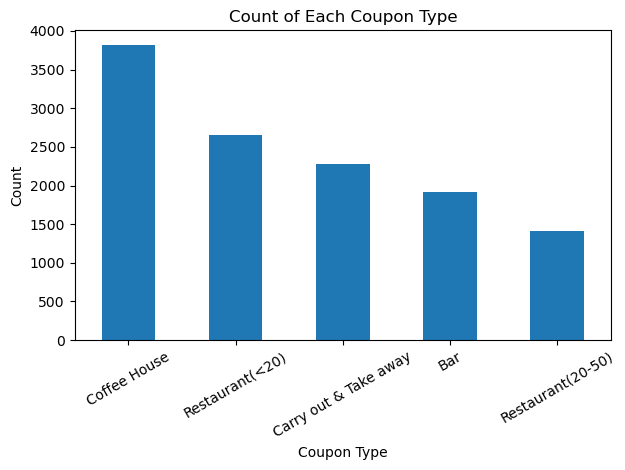

In [20]:
# Creating the Bar plot
coupon_counts = data['coupon'].value_counts()
coupon_counts.plot(kind='bar')

# Customising the visual
plt.title('Count of Each Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

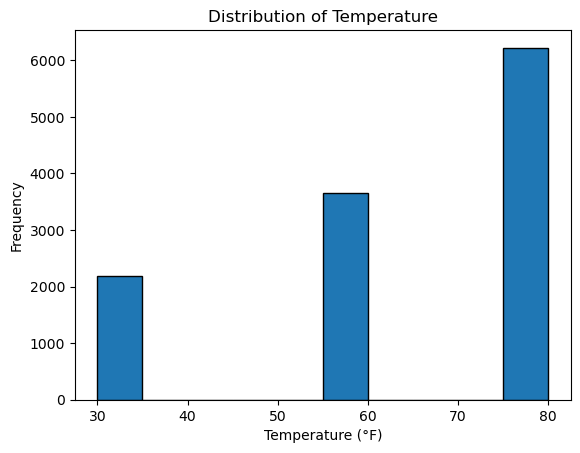

In [23]:
# Creating the histogram
plt.hist(data['temperature'], bins=10, edgecolor='k')

# Customising the visual
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
# Create a new DataFrame with only Bar coupons
bar_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [30]:
# The number of people that accepted the coupon when it was for the Bar
accepted_bar_coupon_count = bar_df['Y'].sum() 
people_w_bar_coupons = len(bar_df)
didnt_accept_bar_coupon_count = people_w_bar_coupons - accepted_bar_coupon_count
percentage_that_accepted_bar_coupon = accepted_bar_coupon_count / people_w_bar_coupons

print(f"Count of people that accepted the bar coupon: {accepted_bar_coupon_count}")
print(f"Count of people that didn't accept the bar coupon: {didnt_accept_bar_coupon_count}")
print(f"Total count of people that received coupons for the bar: {people_w_bar_coupons}")
print(f"Percentage who accepted the bar coupon: {percentage_that_accepted_bar_coupon:.1%}")

Count of people that accepted the bar coupon: 788
Count of people that didn't accept the bar coupon: 1125
Total count of people that received coupons for the bar: 1913
Percentage who accepted the bar coupon: 41.2%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [45]:
# Well, we need to define the two groups to make the comparison, for those that fell in either group
lt_or_et_3 = ["never", "less1", "1~3"] # lt = 'less than', et = 'equal to'
gt_3 = ["4~8", "gt8"] # gt = 'greater than'

# less than or equal to 3 group
bar_fewer = bar_df[bar_df['Bar'].isin(lt_or_et_3)] 
accept_rate_fewer = bar_fewer['Y'].mean()

# greater than 3 group
bar_more = bar_df[bar_df['Bar'].isin(gt_3)]
accept_rate_more = bar_more['Y'].mean()

print(f"Acceptance rate for higher frequency group: {accept_rate_fewer:.1%}")
print(f"Acceptance rate for lesser frequency: {accept_rate_more:.1%}")

Acceptance rate for higher frequency group: 37.3%
Acceptance rate for lesser frequency: 76.2%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
# Like above, we'll need to create the two groups for the comparison
more_than_once = ["1~3", "4~8", "gt8"]
over_25 = ["26-30", "31-35", "36-40", "41-45", "46-50", "50plus"]

# frequent older visitors group
bar_older_freq_visitors = bar_df[(bar_df['Bar'].isin(more_than_once)) & (bar_df['age'].isin(over_25))]
accept_rate_older_freq_visitors = bar_older_freq_visitors['Y'].mean()

# all others group
all_others = bar_df[~((bar_df['Bar'].isin(more_than_once)) & (bar_df['age'].isin(over_25)))]
accept_rate_all_others = all_others['Y'].mean()

print(f"Acceptance rate for frequent visitors older than 25 years old: {accept_rate_older_freq_visitors:.1%}")
print(f"Acceptance rate for all others: {accept_rate_all_others:.1%}")

Acceptance rate for frequent visitors older than 25 years old: 66.7%
Acceptance rate for all others: 40.3%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [39]:
# Jobs to filter out
excluded_jobs = ["Farming & Fishing", "Forestry & Logging"]

# The group that went to bars more than once, had adult passengers, and aren't farmers, fishers, or foresters
filtered_for_group = bar_df[
    (bar_df['Bar'].isin(more_than_once)) &
    (bar_df['passanger'] != "Kid(s)") &
    (~bar_df['occupation'].isin(excluded_jobs))
]
accept_rate_filtered_for_group = filtered_for_group['Y'].mean()

# The group with everyone else
all_others = bar_df[~(
    (bar_df['Bar'].isin(more_than_once)) &
    (bar_df['passanger'] != "Kid(s)") &
    (~bar_df['occupation'].isin(excluded_jobs))
)]
accept_rate_all_others = all_others['Y'].mean()

print(f"Acceptance rate for frequent bar-goers without kids or excluded jobs: {accept_rate_filtered_for_group:.1%}")
print(f"Acceptance rate for all others: {accept_rate_all_others:.1%}")


Acceptance rate for frequent bar-goers without kids or excluded jobs: 70.9%
Acceptance rate for all others: 29.8%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [52]:
# Alright, let's define the groups as a), b), and c)

# a) Go to bars more than once a month, passenger wasn't a kid, and not widowed
group_a = ( (bar_df['Bar'].isin(more_than_once))  &  (bar_df['passanger'] != "Kid(s)") &  (bar_df['maritalStatus'] != "Widowed") )
mask_a = group_a.reindex(data.index, fill_value=False)  # Align to full dataframe (data) so we can combine with group c later
group_a_df = data[mask_a]
accepted_a = group_a_df['Y'].mean()

# b) Go to bars more than once a month and are under 30
under_30 = ["below21", "21", "21-25", "26-30"]
group_b = ( (bar_df['Bar'].isin(more_than_once))  &  (bar_df['age'].isin(under_30)) )
mask_b = group_b.reindex(data.index, fill_value=False) # Align to full dataframe (data) so we can combine with group c later
group_b_df = data[mask_b]
accepted_b = group_b_df['Y'].mean()

# c) Go to cheap restaurants more than 4 times a month and income < $50K
cheap_restaurants = ["4~8", "gt8"]
income_under_50k = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]
group_c = ( (data['RestaurantLessThan20'].isin(cheap_restaurants))  &  (data['income'].isin(income_under_50k)) )
mask_c = group_c # This was already aligned with the full dataframe because this group isn't a part of the bar group
group_c_df = data[mask_c]
accepted_c = group_c_df['Y'].mean()

# Comparison groups
combined_mask = mask_a | mask_b | mask_c # Combining the masks together
combined_group = data[combined_mask] # The combined of groups of the total dataframe that satisfied the binary masks applied to the smaller dataframes
all_others = data[~combined_mask] # Entire table without the filtered groups combined

# Calculate acceptance rates
accept_rate_combined = combined_group['Y'].mean()
accept_rate_all_others = all_others['Y'].mean()

print("Acceptance rates for each group prior to Combination")
print(f"Acceptance rate for group a: {accepted_a:.1%} | Go to bars more than once a month, passenger not a kid, and not widowed")
print(f"Acceptance rate for group b: {accepted_b:.1%} | Go to bars more than once a month and are under 30")
print(f"Acceptance rate for group c: {accepted_c:.1%} | Go to cheap restaurants more than 4 times a month and income < $50K")

print("\nAcceptance rate comparisons after Combination")
print(f"Acceptance rate for combined special group: {accept_rate_combined:.1%}")
print(f"Acceptance rate for all others: {accept_rate_all_others:.1%}")

Acceptance rates for each group prior to Combination
Acceptance rate for group a: 70.9% | Go to bars more than once a month, passenger not a kid, and not widowed
Acceptance rate for group b: 67.5% | Go to bars more than once a month and are under 30
Acceptance rate for group c: 60.3% | Go to cheap restaurants more than 4 times a month and income < $50K

Acceptance rate comparisons after Combination
Acceptance rate for combined special group: 61.6%
Acceptance rate for all others: 55.6%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Drivers who go to bars more frequently (more than once a month) have higher acceptance rates.
- Drivers who go to cheap restaurants more frequently also show higher acceptance, especially if their income is under 50K.
- Younger drivers (under 30) who go to bars often are more likely to accept bar coupons.
- Older frequent bar-goers (over 25) also have higher acceptance, but the younger group under 30 may be more spontaneous and responsive.
- Drivers with passengers who are not kids (like friends or partners) are more likely to accept bar coupons, possibly because they are more open to group social activities.
- Drivers who are not widowed and are not in an outdoor-based profession (like farming, fishing, forestry) tend to accept more, maybe due to lifestyle or social habits.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

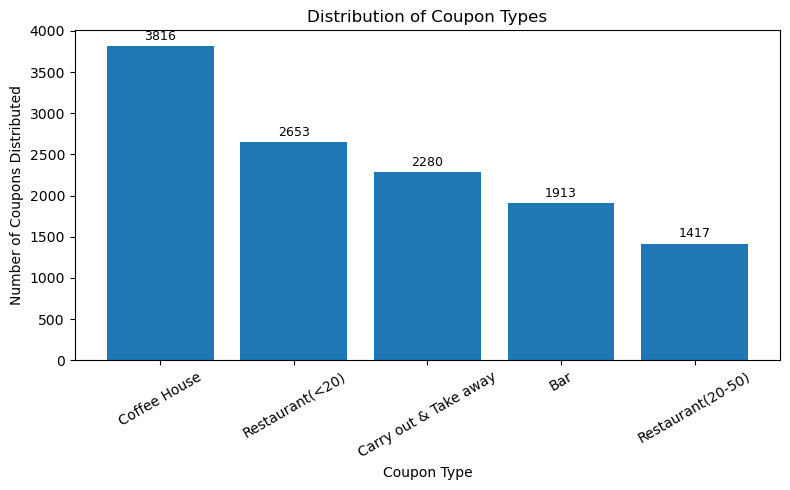

In [88]:
# Let's start by checking out how much of a sample size we have per type of coupon that was distributed
coupon_counts = data['coupon'].value_counts()

# I'm going to use matplotlib for this, and Seaborn for the ones below! 
plt.figure(figsize=(8, 5))
plt.bar(coupon_counts.index, coupon_counts.values)
plt.ylabel('Number of Coupons Distributed')
plt.xlabel('Coupon Type')
plt.title('Distribution of Coupon Types')
plt.xticks(rotation=30)
plt.tight_layout()

# Data labels really do help for visuals like this
for idx, value in enumerate(coupon_counts.values):
    plt.text(idx, value + max(coupon_counts.values)*0.01, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [60]:
# I personally love coffee and it just so happens that coffee coupons are the largest coupon group! 
# Let's investigate the Coffee House and the Restaurant(20-50) Coupon Groups in parallel.

# DataFrame for Coffee House coupons
coffee_df = data[data['coupon'] == 'Coffee House']

# DataFrame for Restaurant($20-$50) coupons
rest_20_50_df = data[data['coupon'] == 'Restaurant(20-50)']

# Let's check out both groups
print("Checking out Coffee House coupon group")
print(f"Coffee House coupons: {len(coffee_df)} rows")
display(coffee_df.head())

print("\nAnd a peak now at the Restaurant(20-50) coupon group")
print(f"Restaurant($20-$50) coupons: {len(rest_20_50_df)} rows")
display(rest_20_50_df.head())

Checking out Coffee House coupon group
Coffee House coupons: 3816 rows


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0



And a peak now at the Restaurant(20-50) coupon group
Restaurant($20-$50) coupons: 1417 rows


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0


In [61]:
# Acceptance Rates now

# Coffee House coupon acceptance
coffee_accept = coffee_df['Y'].sum()
coffee_total = len(coffee_df)
coffee_accept_rate = coffee_accept / coffee_total
print(f"Coffee House coupon acceptance rate: {coffee_accept_rate:.1%}")

# Restaurant($20-$50) coupon acceptance
rest_accept = rest_20_50_df['Y'].sum()
rest_total = len(rest_20_50_df)
rest_accept_rate = rest_accept / rest_total
print(f"Restaurant($20-$50) coupon acceptance rate: {rest_accept_rate:.1%}")

Coffee House coupon acceptance rate: 49.6%
Restaurant($20-$50) coupon acceptance rate: 44.6%


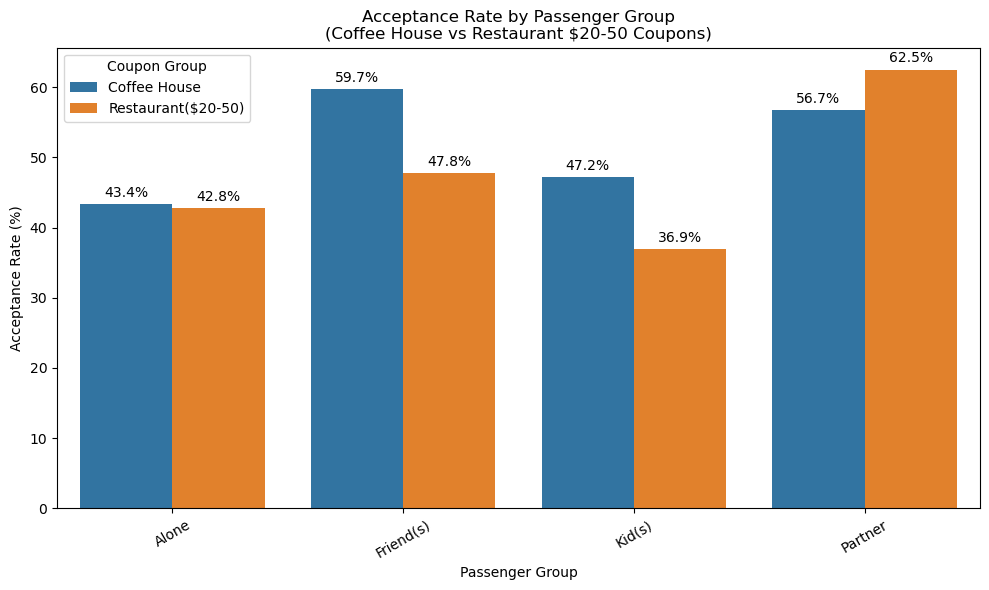

In [85]:
coffee_passenger = coffee_df.groupby('passanger')['Y'].mean().reset_index()
coffee_passenger['Coupon Group'] = 'Coffee House'
rest_passenger = rest_20_50_df.groupby('passanger')['Y'].mean().reset_index()
rest_passenger['Coupon Group'] = 'Restaurant($20-50)'

combined = pd.concat([coffee_passenger, rest_passenger], ignore_index=True)
combined.rename(columns={'Y': 'Acceptance Rate', 'passanger': 'Passenger Group'}, inplace=True)
combined['Acceptance Rate'] = combined['Acceptance Rate'] * 100  # To show as percent

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined, x='Passenger Group', y='Acceptance Rate', hue='Coupon Group')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Passenger Group\n(Coffee House vs Restaurant $20-50 Coupons)')
plt.xticks(rotation=30)
plt.tight_layout()

# As mentioned above, data labels really do help for visuals like this
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
plt.show()

Coffee House coupon acceptance rates by time of day:
10AM: 63.5%
10PM: 42.9%
2PM: 54.5%
6PM: 41.2%
7AM: 44.0%


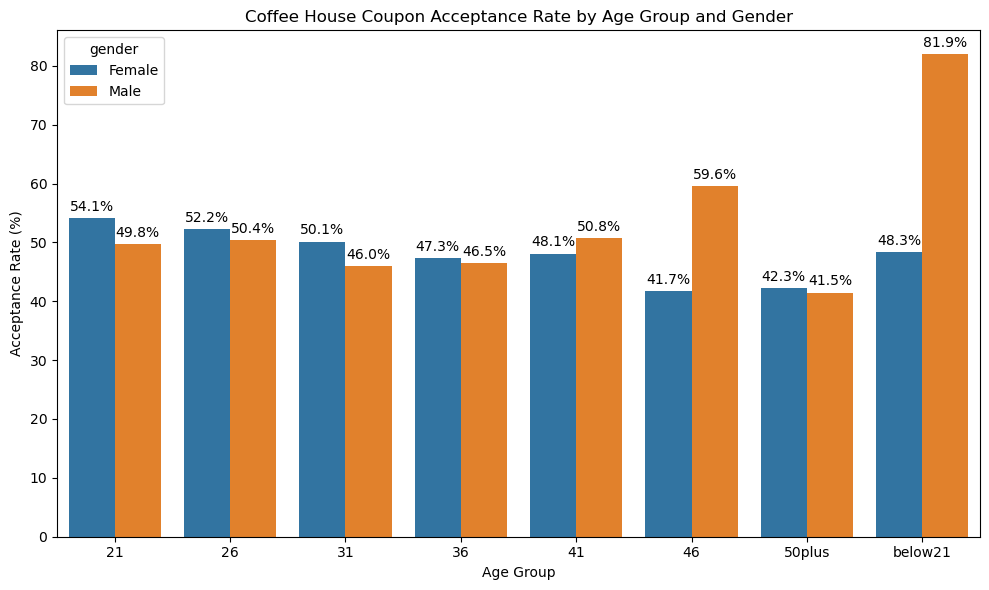

In [89]:
# Let's include all the code for Coffee House in one code block:

# This one is a general Time of Day, it seems like a low hanging fruit to check
print("Coffee House coupon acceptance rates by time of day:")
coffee_time_rates = coffee_df.groupby('time')['Y'].mean()
for t, rate in coffee_time_rates.items():
    print(f"{t}: {rate:.1%}")

# Now, let's check out what the acceptance rates are per age group, broken up by gender
    
# Calculate acceptance rates by age group and gender for Coffee House
coffee_age_gender = coffee_df.groupby(['age', 'gender'])['Y'].mean().reset_index()
coffee_age_gender['Acceptance Rate'] = coffee_age_gender['Y'] * 100  # turning this into a percent
coffee_age_gender.rename(columns={'age': 'Age Group'}, inplace=True)

# The actual plot below
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=coffee_age_gender, x='Age Group', y='Acceptance Rate', hue='gender')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance Rate by Age Group and Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# As mentioned above, data labels really do help for visuals like this
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
plt.show()

In [82]:
# Time of Day
print("Restaurant($20-$50) coupon acceptance rates by time of day:")
rest_time_rates = rest_20_50_df.groupby('time')['Y'].mean()
for t, rate in rest_time_rates.items():
    print(f"{t}: {rate:.1%}")
    
# Occupation 
print("\nRestaurant($20-$50) coupon acceptance rates by occupation:")
rest_occupation_rates = rest_20_50_df.groupby('occupation')['Y'].mean().sort_values(ascending=False)
for occupation, rate in rest_occupation_rates.items():
    print(f"{occupation}: {rate:.1%}")
    
# Income
print("\nRestaurant($20-$50) coupon acceptance rates by income:")
rest_income_rates = rest_20_50_df.groupby('income')['Y'].mean().sort_index()
for income, rate in rest_income_rates.items():
    print(f"{income}: {rate:.1%}")

    
    
# Let's test now for acceptance rates to higher cost per plate restaurants by young vs old age groups when in a high income bracket

# Filter for high income group
high_income = ["$100000 or More", "$87500 - $99999"]
high_income_df = data[data['income'].isin(high_income)]
younger_ages = ['below21', '21', '26']

# '50plus' high income group
wealthy_50plus = high_income_df[high_income_df['age'] == '50plus']
accept_wealthy_50plus = wealthy_50plus['Y'].mean()

# Younger high income group
wealthy_younger = high_income_df[high_income_df['age'].isin(younger_ages)]
accept_wealthy_younger = wealthy_younger['Y'].mean()

print(f"\nAcceptance rate for high-income (50+ years old): {accept_wealthy_50plus:.1%}")
print(f"Acceptance rate for high-income younger group (26 years old and younger): {accept_wealthy_younger:.1%}")

Restaurant($20-$50) coupon acceptance rates by time of day:
10AM: 60.7%
10PM: 33.9%
2PM: 54.9%
6PM: 50.3%
7AM: 40.2%

Restaurant($20-$50) coupon acceptance rates by occupation:
Production Occupations: 72.7%
Healthcare Support: 65.6%
Office & Administrative Support: 62.2%
Construction & Extraction: 61.9%
Healthcare Practitioners & Technical: 56.7%
Legal: 53.8%
Computer & Mathematical: 52.7%
Personal Care & Service: 50.0%
Architecture & Engineering: 50.0%
Sales & Related: 50.0%
Protective Service: 47.6%
Management: 47.6%
Life Physical Social Science: 47.4%
Student: 44.5%
Building & Grounds Cleaning & Maintenance: 42.9%
Education&Training&Library: 41.5%
Transportation & Material Moving: 39.1%
Arts Design Entertainment Sports & Media: 37.7%
Business & Financial: 37.0%
Unemployed: 35.2%
Community & Social Services: 34.8%
Food Preparation & Serving Related: 34.4%
Retired: 25.0%
Installation Maintenance & Repair: 20.0%
Farming Fishing & Forestry: 16.7%

Restaurant($20-$50) coupon acceptance r

### Final Observations

#### Coffee House
- Coffee House coupons are most effective earlier in the day—people may be more likely to accept coffee-related offers during typical “coffee times.”
- There is no significant gender difference in acceptance rates for coffee house coupons overall.
- Younger individuals are more receptive to coffee house coupons. Acceptance drops in older age brackets.
- Among the youngest coffee coupon recipients, young men are dramatically more likely to accept than young women.

#### Restaurant (20-50 per plate)
- Like with coffee house coupons, offers made in the morning and early afternoon see the highest acceptance rates. Late evening or early morning coupons are less effective.
- Manual labor, support, and healthcare occupations are much more likely to accept restaurant coupons, while retired, unemployed, and food service workers are much less likely.
- People with mid-range or high incomes are more likely to accept high-value restaurant coupons. Very low or some mid-high income groups are less responsive.
- Younger, wealthy individuals are far more likely to accept 20-50 per plate restaurant coupons than older wealthy individuals, possibly reflecting lifestyle or family situation differences.